In [7]:
!py -3.13 -m pip install pandas



  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 3.8 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.0 MB 6.7 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/11.0 MB 8.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------- ------------------------------ 3.1/12.8 MB 15.6 MB/s eta 0:00:01
   ------------------- -------------------- 6.3/12.8 MB 15.6 MB/s eta 0:00:01
   ------------------------------- -------- 10.0/12.8 MB 16.6 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 15.6 MB/s eta 0:00:00
Using cached pytz-2025.2-


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

import sqlite3
import pandas as pd

# Connect to your database file
conn = sqlite3.connect("datasets/Weather.db")

# Read table names
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables:", tables)

# Example: view Weather table
df = pd.read_sql_query("SELECT * FROM daily_weather;", conn)
print(df)

conn.close()







Available tables:               name
0         stations
1  sqlite_sequence
2    daily_weather
3       thresholds
    weather_id  station_id        date  tmax_f  tmin_f  wspd_mph  \
0            1           1  2023-07-01    95.2    75.1      12.0   
1            2           1  2023-07-02    88.5    70.3       8.5   
2            3           1  2023-07-03    92.0    71.0      21.3   
3            4           1  2023-07-04    85.6    65.2      15.8   
4            5           1  2023-07-05    97.1    77.0      10.2   
..         ...         ...         ...     ...     ...       ...   
91         356           1  2023-12-17     0.0   -23.0       9.0   
92         357           1  2023-12-18    24.0     8.0      25.0   
93         358           1  2023-12-19    93.0    84.0      17.0   
94         367           1  2023-12-28    28.0    17.0      37.0   
95         369           1  2023-12-30   -28.0   -39.0      32.0   

    precipitation_in  is_extremeWeather  
0               0.00        

In [2]:
!py -3.13 -m pip install matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------- ------------------------ 3.1/8.1 MB 16.2 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 14.7 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 14.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------------- ------------------------ 2.6/7.0 MB 16.3 MB/s eta 0:00:01
   ------------------------------------- -- 6.6/7.0 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 15.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


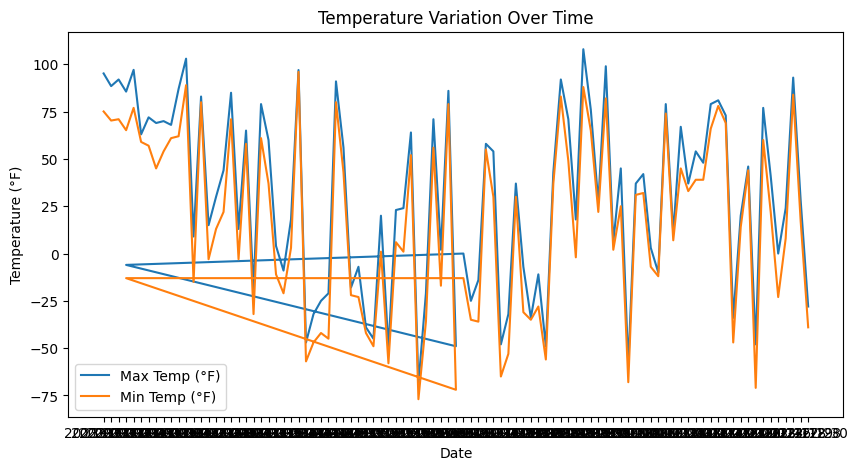

In [7]:
## Temperature variation over time

plt.figure(figsize=(10,5))
plt.plot(df['date'], df['tmax_f'], label='Max Temp (°F)')
plt.plot(df['date'], df['tmin_f'], label='Min Temp (°F)')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()


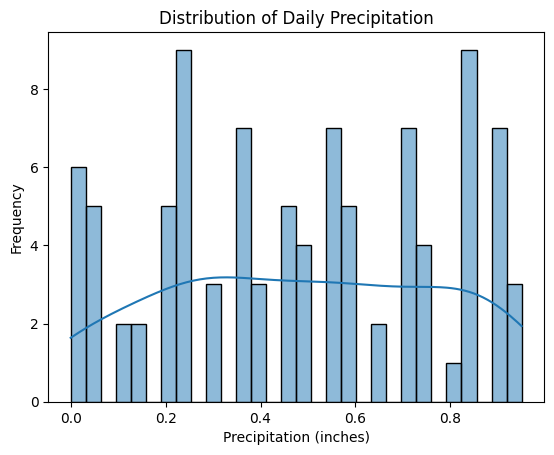

In [ ]:
# Distribution of daily precipitation

sns.histplot(df['precipitation_in'], bins=30, kde=True)
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()


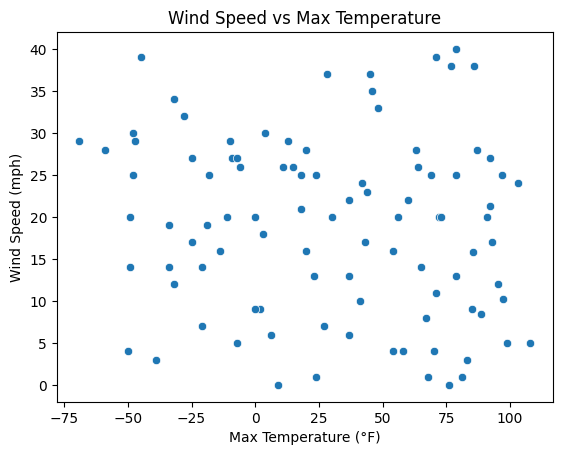

In [ ]:
#Scatter plot: Temperature vs Wind Speed
sns.scatterplot(x='tmax_f', y='wspd_mph', data=df)
plt.title('Wind Speed vs Max Temperature')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Wind Speed (mph)')
plt.show()


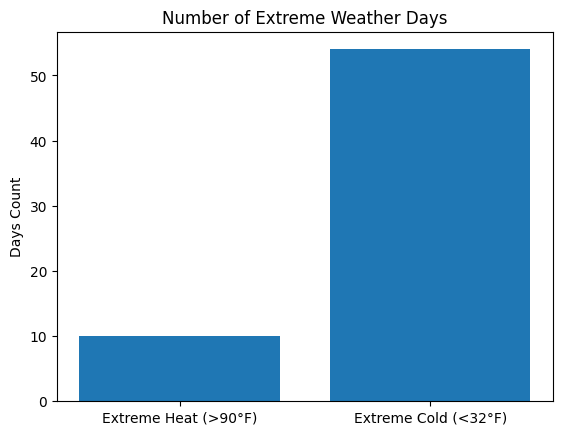

In [ ]:
#Extreme heat vs cold days (bar chart)
extreme_heat = df[df['tmax_f'] > 90].shape[0]
extreme_cold = df[df['tmin_f'] < 32].shape[0]

plt.bar(['Extreme Heat (>90°F)', 'Extreme Cold (<32°F)'], [extreme_heat, extreme_cold])
plt.title('Number of Extreme Weather Days')
plt.ylabel('Days Count')
plt.show()
